In [1]:
# import dependencies

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# storing data from csv
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
raw_data.describe(include='all') #include='all' make the description show the categorical data too
#notice that there are some missing values (since the count isn't the same)
#notice that there are outliers from max price is really differ from the 75%

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [4]:
# notice that there are 312 unique models which are too many to be benefical in predication. Therefore, drop the feature.
data = raw_data.drop(['Model'], axis=1)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [5]:
#now dealing with missing value using pd.dropna() method
data.isnull().sum() #sum the missing data from the entire dataframe
# we see that some Price and EngineV are missing.

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


<AxesSubplot:xlabel='Price', ylabel='Count'>

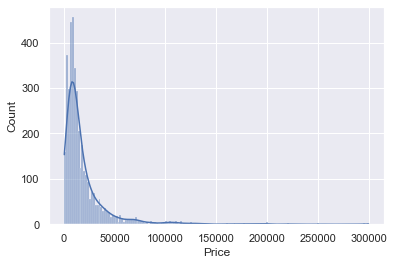

In [42]:
#Explore the distribution
# displot() is a seaborn plotting which show both histogram and line 
#kde = kernel density estimation -> to show the kde line 
sns.histplot(data_no_mv['Price'],kde=True)

# we see some  utliers with very high price

In [8]:
#let's keep only the first 99% of the cheapest car in the model and drop the 1% most expensive cars out
# to do that, using the quantile() method is good.

q = data_no_mv['Price'].quantile(0.99)
data1 = data_no_mv[data_no_mv['Price']<q]

data1.describe()
# from 4025 observations, dropping the 1% most expensive cars left us 3984 observation and the max price is at 129222

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


<AxesSubplot:xlabel='Mileage', ylabel='Count'>

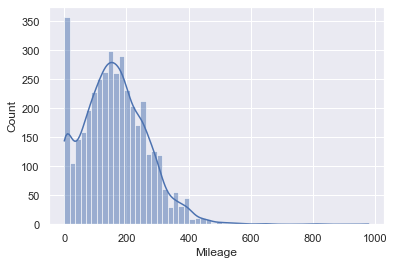

In [43]:
#let's check the distribution of the mileage too
sns.histplot(data_no_mv['Mileage'],kde=True)

#the histogram shape is kinda right skew too. Therefore let's do the same quantile(0.99)

In [10]:
q = data1['Mileage'].quantile(0.99)
data2 = data1[data1['Mileage']<q]
data2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


<AxesSubplot:xlabel='EngineV', ylabel='Count'>

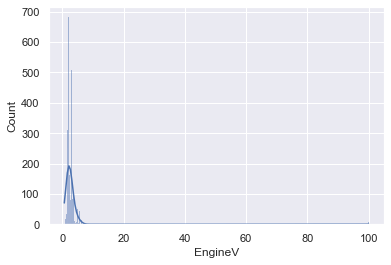

In [44]:
# check the EngingeV too
sns.histplot(data2['EngineV'],kde=True)
#the data is not make sense. The most Engine Volume that is still legit is 6.5 litre. 
# The 99.99 in the dataframe must be some kind of mistakes

#let's drop any observations that has EngineV more than 6.5 

In [12]:
data3 = data2[data2['EngineV']<6.5]
data3.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


<AxesSubplot:xlabel='EngineV', ylabel='Count'>

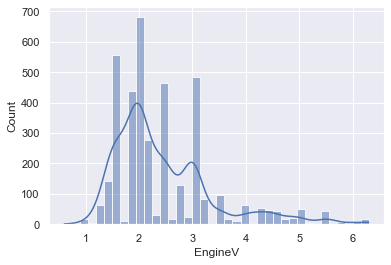

In [45]:
sns.histplot(data3['EngineV'],kde=True)

#a lot better EngineV distribution

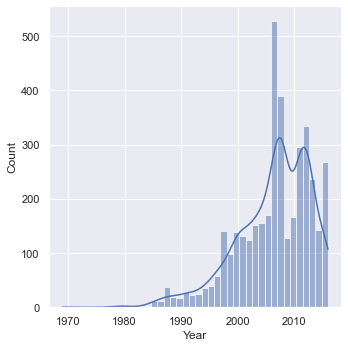

In [46]:
#now let's do Year feature
sns.displot(data3['Year'],kde=True)

#we see that there are few 'vintage' cars from 1969 which is droppable for better generalize the model

In [14]:
#let's drop the first 1% oldest cars out

In [15]:
q = data3['Year'].quantile(0.01)
data4 = data3[data3['Year']>q]
data4.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


In [16]:
#dropping observations make the index skipp. Therefore, we need to reset index 
clean_data = data4.reset_index(drop=True)
clean_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [17]:
#To make sure that we can use linear regression, we need to check the OLS(ordinary least square) assumption
# OLS Assumption 1: The linear regression model is “linear in parameters.”
# OLS Assumption 2: There is a random sampling of observations (Checked***)
# OLS Assumption 3: The conditional mean should be zero. 
# OLS Assumption 5: Spherical errors: There is homoscedasticity and no autocorrelation. 
# OLS Assumption 6: Error terms should be normally distributed. (Checked***)

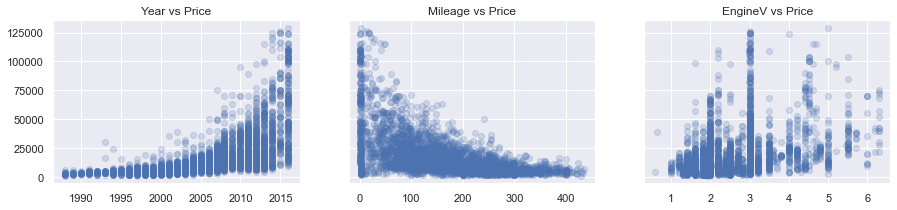

In [48]:
#let's check the linearity (linear relationship with Dependent variable exists)
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,3))
ax1.scatter(clean_data['Year'], clean_data['Price'],alpha=0.2)
ax1.set_title('Year vs Price')
ax2.scatter(clean_data['Mileage'], clean_data['Price'],alpha=0.2)
ax2.set_title('Mileage vs Price')
ax3.scatter(clean_data['EngineV'], clean_data['Price'],alpha=0.2)
ax3.set_title('EngineV vs Price')

plt.show()

# the scatter is not linear. Thus, need a fix

In [19]:
# we se a exponential relationship with price. Therefore, convert Price to Log of Price will make the scatter linear
# using np.log() will easily convery any array to natural log of itself
log_price = np.log(clean_data['Price'])
clean_data['Log Price'] = log_price

#original price can be drop
clean_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


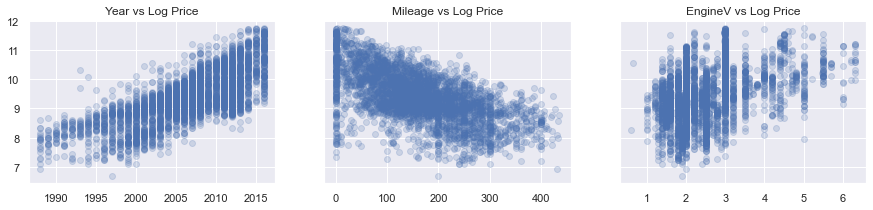

In [49]:
#Now, let's scatter all the features with the log price to check the linearity.
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True,figsize = (15,3))
ax1.scatter(clean_data['Year'], clean_data['Log Price'],alpha=0.2)
ax1.set_title('Year vs Log Price')
ax2.scatter(clean_data['Mileage'], clean_data['Log Price'],alpha=0.2)
ax2.set_title('Mileage vs Log Price')
ax3.scatter(clean_data['EngineV'], clean_data['Log Price'],alpha=0.2)
ax3.set_title('EngineV vs Log Price')

plt.show()
# The linearity is obvious now

In [21]:
# next check the Multicollinearity

# we can use VIF (Variance Inflation Factor) to detetmine the Milticollinearity 
# Milticollinearity = the linear relationship within each features

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = clean_data[['Year','Mileage','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['feature'] =  variables.columns
vif

# Year feature has a very high VIF which show the multicollinearity. Therefore, drop this feature from the model


,VIF,feature
0,10.354854,Year
1,3.791584,Mileage
2,7.662068,EngineV


In [22]:
clean_data_no_multi = clean_data.drop(['Year'], axis = 1)
clean_data_no_multi

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,8.779557


In [23]:
# Now it's time to deal with dummy variable since there are several categorial variables
# pd.get_dummies() are very helpful to turn this categological variables into dummies
# drop_first cut the redundant feature

clean_dummy = pd.get_dummies(clean_data_no_multi, drop_first = True)
clean_dummy.head()

,Price,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [24]:
#Now, the final touch. Let's drop the price and move the Log Price to the first column
clean_dummy.drop('Price',axis = 1,inplace=True)

In [25]:
clean_dummy

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [26]:
clean_dummy.columns.values
cols = ['Log Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [27]:
data_preprocessed = clean_dummy[cols]

In [28]:
data_preprocessed.head()

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# EXERCISE

### Part 1
Calculate the variance inflation factors for all variables contained in data_preprocessed. Anything strange?

### Part 2
As mentioned in the lecture, your task is to calculate the variance inflation factor (VIF) of all variables including the dummies (but without the dependent variable).

### Part 3
Now calculate the VIFs for a data frame where we include the dummies, without 'log_price', but DO NOT DROP THE FIRST DUMMY. Anything strange now?

In [29]:
#part1 Calculate the variance inflation factors for all variables contained in data_preprocessed. Anything strange?

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_preprocessed
vif2 = pd.DataFrame()
vif2['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif2['feature'] =  variables.columns
vif2

#note that VIF for Log Price is very High which mean it's linerly corelated with some feature

,VIF,feature
0,41.981260,Log Price
1,4.460434,Mileage
2,13.445639,EngineV
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


In [30]:
### Part 2 
# As mentioned in the lecture, your task is to calculate the variance inflation factor (VIF) 
# of all variables including the dummies (but without the dependent variable).

#let's begin by dropping log price from data_preprocessed

data_drop_lp = data_preprocessed.drop('Log Price',axis=1)
data_drop_lp

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [31]:
variables = data_drop_lp
vif3 = pd.DataFrame()
vif3['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif3['feature'] =  variables.columns
vif3

#still the engineV is high because

,VIF,feature
0,4.459662,Mileage
1,7.841729,EngineV
2,2.294007,Brand_BMW
3,2.868649,Brand_Mercedes-Benz
4,1.641712,Brand_Mitsubishi
5,2.086774,Brand_Renault
6,2.162166,Brand_Toyota
7,2.844515,Brand_Volkswagen
8,1.464260,Body_hatch
9,1.534059,Body_other


In [32]:
### Part 3 
#Now calculate the VIFs for a data frame where we include the dummies, without 'log_price', 
#but DO NOT DROP THE FIRST DUMMY. Anything strange now?

first_dummy_included = pd.get_dummies(clean_data_no_multi)
first_dummy_included



,Price,Mileage,EngineV,Log Price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,4200.0,277,2.0,8.342840,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
1,7900.0,427,2.9,8.974618,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,13300.0,358,5.0,9.495519,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,23000.0,240,4.2,10.043249,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,18300.0,120,2.0,9.814656,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,11500.0,163,2.5,9.350102,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3863,17900.0,35,1.6,9.792556,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
3864,125000.0,9,3.0,11.736069,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3865,6500.0,1,3.5,8.779557,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


In [33]:
variables = first_dummy_included
vif4 = pd.DataFrame()
vif4['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif4['feature'] =  variables.columns
vif4

#the error we get is from not dropping the first dummy. 
#The main reason is what we've discussed before. 
#When a car is an 'Audi' all other brand dummies are 0. 
#When a car is not 'Audi', at least one of them will be 1. 
#By including all dummies have introduced multicollinearity (**perfect multicollinearity**)!!! 

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF,feature
0,4.472360,Price
1,2.394282,Mileage
2,1.816796,EngineV
3,7.288681,Log Price
4,inf,Brand_Audi
5,inf,Brand_BMW
6,inf,Brand_Mercedes-Benz
7,inf,Brand_Mitsubishi
8,inf,Brand_Renault
9,inf,Brand_Toyota


In [61]:
#So far there are only the data cleaning and preparations.
#The regression itself Begins here.

#let's call the independent variables -> inputs and dependent variable -> target as a common name for ML
targets = data_preprocessed['Log Price']
inputs = data_preprocessed.drop(['Log Price'], axis = 1)

In [63]:
# scale the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
scaled_inputs = scaler.transform(inputs)

In [68]:
#Train-Test Split
from sklearn.model_selection import train_test_split
#the default train-test ratio from the class is 75:25. We will modify that to 80:20
#also set the random state = 365 according to the excerices
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size = 0.2, random_state = 365)

#now we have the randomized + scaled train / test array ready

In [71]:
# Next, we need to fit the regression model with the train data
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

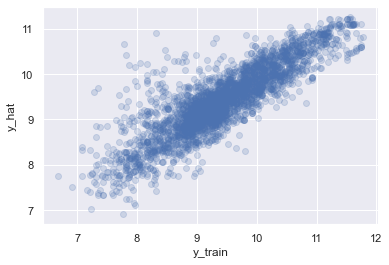

In [82]:
# To confirm the fitness of the model, let's check the regression model(a.k.a yhat) with the y_train data
y_hat = reg.predict(x_train)

#now plot the y_hat and y_train expecting 1:1 linear relationship
plt.scatter(y_train, y_hat, alpha = 0.2)
plt.xlabel('y_train')
plt.ylabel('y_hat')

plt.show()
# the plot is highly 1:1 linear -> as expected

<AxesSubplot:xlabel='Log Price', ylabel='Count'>

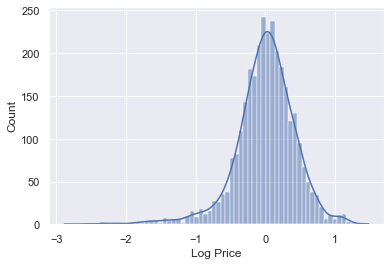

In [86]:
#also, another good accuracy check is the residual plot 
#(residual is the difference between the regression target and the actual inputs)

residuals = y_train-y_hat
sns.histplot(residuals, kde=True)

#even the residuals are piling at zero as ecpected, some are highly negative as shown by left skew
# we will deal with that later to improve the model

In [88]:
# let's see the r2 score of the model
reg.score(x_test,y_test)
#note that this is the r2 not the adjusted_r2

0.7726984972665857

In [94]:
#to describe the model let's show the bias and weights of the test model (bias is the intercept and weights are the coeficients)

bias = reg.intercept_
weight = reg.coef_

summary = pd.DataFrame(data=inputs.columns.values ,columns=['Feature'])
summary['Weight'] = reg.coef_

summary

# Noted that this is the coef to the relation to 'Log Price'
# Also, noted that the categorical inputs are dummied and the coef is not very expnlanatory
# normally the we don't scale the categorical features -> Will deal with that later.

,Feature,Weight
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


Text(0, 0.5, 'y_test')

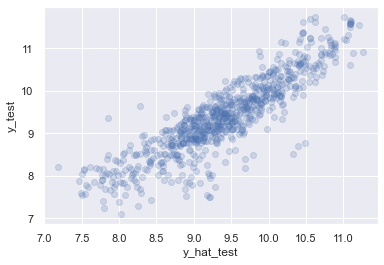

In [96]:
# Now we already have the train model ready and explained. 
#It's time to test the model with the test data to see the accuracy of the model

#Earlier we have prepared the train_test_split data to test the model. 
#After the training, now is the time to use the test data to test the model

#remember don't train(fit) the model on this test data. We need to test the old fitted model on the new data.
y_hat_test = reg.predict(x_test)

#after this we could compated the y_hat_test with the y_test to check the accuracy of the model

plt.scatter(y_hat_test,y_test,alpha=0.2)
plt.xlabel('y_hat_test')
plt.ylabel('y_test')

# Note that we expected to see 1:1 relation to confirm the accuracy of the model
# the scatter plot seems to show 1:1 relation. 
# However, we could confirm that by comparing the weight of the test model

In [102]:
#let use a dataframe to compare the output (price) of the test prediction (y_hat_test) and the actual data (y_test)

#remember that the output here is the Log Price while we need the actual price.
# thus using np.exp() to turn the log into the normal number

accuracy_table = pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])
accuracy_table['y_test'] = np.exp(y_test)


accuracy_table

,Predictions,y_test
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


In [106]:
# Something is still not right. The table show a lot of NaN.
# this is because the index arrangement is different between two datasets 
#(the y_test index is randomized while the newly created y_hat_test is still sorted)
# Thus let's reset index of the y_test
y_test = y_test.reset_index(drop = True)
y_test

0       7.740664
1       7.937375
2       7.824046
3       8.764053
4       9.121509
         ...    
769    10.292146
770     9.169518
771     9.814656
772    11.134589
773     9.287301
Name: Log Price, Length: 774, dtype: float64

In [107]:
accuracy_table = pd.DataFrame(np.exp(y_hat_test),columns=['Predictions'])
accuracy_table['y_test'] = np.exp(y_test)


accuracy_table

#the table loolks right.

,Predictions,y_test
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [112]:
# now let's calculate the residuals between the y_test (price from the test data) 
# and prediction(price from y_hat_test)

accuracy_table['Residuals'] = abs(np.exp(y_hat_test) - np.exp(y_test))
accuracy_table['% diff'] = accuracy_table['Residuals']*100/np.exp(y_test)
accuracy_table.head()

,Predictions,y_test,Residuals,% diff
0,10685.501696,2300.0,8385.501696,364.587030
1,3499.255242,2800.0,699.255242,24.973402
2,7553.285218,2500.0,5053.285218,202.131409
3,7463.963017,6400.0,1063.963017,16.624422
4,11353.490075,9150.0,2203.490075,24.081859


In [113]:
accuracy_table.describe()

,Predictions,y_test,Residuals,% diff
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,5563.976826,36.256693
std,13133.197604,19967.858908,9597.712269,55.066507
min,1320.562768,1200.000000,15.312161,0.062794
25%,7413.644234,6900.000000,1072.798174,12.108022
50%,11568.168859,11600.000000,2584.930483,23.467728
75%,20162.408805,20500.000000,5937.197234,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [116]:
#let's sort by the difference to see any anomally
accuracy_table.sort_values(by=['% diff'],ascending = False)

# Something is still wrong with some cars. They have predicted price several hundreds% over the actual price.
# They must have some damaged feature which are not included in the model.
# maybe they are the cars from the accidents

,Predictions,y_test,Residuals,% diff
639,30628.277108,4999.0,25629.277108,512.688080
532,10019.903027,1800.0,8219.903027,456.661279
451,35956.498331,6500.0,29456.498331,453.176897
162,9954.416247,1800.0,8154.416247,453.023125
657,32481.045510,6000.0,26481.045510,441.350758
...,...,...,...,...
367,42703.676996,42500.0,203.676996,0.479240
110,25614.137960,25500.0,114.137960,0.447600
60,12469.207487,12500.0,30.792513,0.246340
742,16960.310476,16999.0,38.689524,0.227599
